# Банки — Анализ оттока клиентов

Ссылка на презентацию: https://drive.google.com/file/d/1YsxwV1Gozb73ADS5sQbIgToKrspuE8py/view?usp=sharing

Ссылка на Дашборд: https://public.tableau.com/views/_16802052205990/Sheet1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

### Задача**:**

Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

- Проведите исследовательский анализ данных,
- Выделите портреты клиентов, которые склонны уходить из банка,
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных*

### 1. Предобработка

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn. preprocessing import OneHotEncoder
from scipy import stats as st

Импортируем необходимые библиотеки

In [4]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

Загружаем файл

In [5]:
def check_df(df):
    print('Info:', df.info())
    print('duplicated:', df.duplicated().sum())
    print('isna:', df.isna().sum())
    display('describe:', df.describe().T)
    display(df.head(10))

Функция для ознакомления с данными

In [6]:
check_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
Info: None
duplicated: 0
isna: USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credi

'describe:'

,count,mean,std,min,25%,50%,75%,max
USERID,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
EST_SALARY,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


В датасете 10000 строк, 2295 пропусков в поле balance, 26 в поле age, поля city и gender имеют нечисловые значения.   
Описание полей:  

- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — приблизительная оценка собственности клиента,
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — был ли клиент активен последнее время,
- salary — заработная плата клиента
- churn — уходит или нет.

In [7]:
df.columns = df.columns.str.lower()

Приводим названия столбцов к нижнему регистру

In [8]:
df.apply(pd.to_numeric, errors='ignore')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


приведем все к численным значениям

Создаем числовые столбцы для значений в полях пол и город

In [10]:
df['gen_cod'] = np.where(df['gender'] == 'М', 1, 0)
df['jar'] = np.where(df['city'] == 'Ярославль', 1,0)
df['ryb'] = np.where(df['city'] == 'Рыбинск', 1,0)
df['rost']  = np.where(df['city'] == 'Ростов', 1,0)

In [11]:
df[df['balance'].isna()].describe().T

,count,mean,std,min,25%,50%,75%,max
userid,2295.0,172069.447930,33337.084589,114182.00,143095.5,172659.00,201551.000,229145.00
score,2295.0,865.352070,89.603091,642.00,871.0,903.00,922.000,990.00
age,2279.0,42.093023,11.941551,18.00,33.0,40.00,49.000,86.00
equity,2295.0,0.050980,0.225872,0.00,0.0,0.00,0.000,3.00
balance,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
products,2295.0,1.162092,0.402532,0.00,1.0,1.00,1.000,3.00
credit_card,2295.0,0.815686,0.387824,0.00,1.0,1.00,1.000,1.00
last_activity,2295.0,0.549455,0.497657,0.00,0.0,1.00,1.000,1.00
est_salary,2295.0,226310.208654,199771.793737,20274.03,120347.7,174160.68,240014.995,1333687.36
churn,2295.0,0.005664,0.075066,0.00,0.0,0.00,0.000,1.00


In [12]:
df[df['balance'].notna()].describe().T

,count,mean,std,min,25%,50%,75%,max
userid,7705.0,171738.837508,3.381978e+04,94561.0,142639.00,172740.0,201168.00,2.291360e+05
score,7705.0,843.739260,5.533216e+01,689.0,801.00,840.0,882.00,1.000000e+03
age,7695.0,42.924366,1.224401e+01,18.0,33.00,40.0,52.00,8.600000e+01
equity,7705.0,3.395068,1.584477e+00,0.0,2.00,4.0,5.00,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.2,980705.85,1.191136e+08
products,7705.0,2.080986,7.572310e-01,1.0,2.00,2.0,2.00,5.000000e+00
credit_card,7705.0,0.640104,4.800009e-01,0.0,0.00,1.0,1.00,1.000000e+00
last_activity,7705.0,0.515769,4.997837e-01,0.0,0.00,1.0,1.00,1.000000e+00
est_salary,7705.0,124501.872366,1.046635e+05,2546.3,67551.81,106222.2,155045.67,1.395064e+06
churn,7705.0,0.234523,4.237278e-01,0.0,0.00,0.0,0.00,1.000000e+00


Пропуски занимают около 23% данных, для понимания дальнейшего формата работы с ними проверяем однородность данных в срезах с пропусками и без пропусков, наблюдаем значительные отличия по параметрам, например:  
-  среднее значение объектов в собственности в данных с пропусками - 0,05, медиана - 0, а в данных без пропусков среднее - 3,4, медиана - 4  
- среднее количества продуктов в данных с пропусками - 1,16, медиана - 1, а в данных без пропусков  среднее - 2,1, медиана - 2  
- средний скоринговый балл в данных с пропусками - 865, медиана - 903, а в данных без пропусков среднее - 843, медиана 840

Делаем вывод о значительных различиях в стоках с пропусками в столбце balance и без, что говорит о сильной связи пропусков и данных. Оснований заменить пропуски какими либо данными нет, удалить их так же не можем. Оставляем в том виде, в котором есть.

### 2. Исследовательский анализ

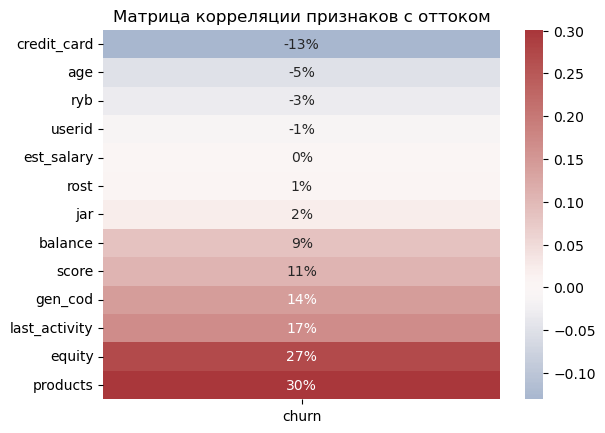

In [13]:
corr = df.corr()
sns.heatmap(corr.loc[:,['churn']].drop('churn').sort_values(by = 'churn'), annot = True, fmt = ".0%", cmap = "vlag", center = 0)
plt.title('Матрица корреляции признаков с оттоком');

Определяем линейные зависимости ухода клиента к остальным параметрам. При получении задачи заказчик озвучил, что необходимо рассмотреть все линейные зависимости более 10%.Используя шкалу Чеддока имеем следующие значения:   

Умеренная зависимость ухода клиентов к количеству используемых продуктов Банка - 0,3  
Слабая зависимость от таких признаков как скоринговый балл (0,11), пол клиента(0,14), активность в последнее время (0,17) и количество объектов в собственности (0,27).  
Слабую обратную зависимость имеет наличие кредитной карты (-0,13)


In [14]:
df.groupby('churn').mean()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,gen_cod,jar,ryb,rost
churn,,,,,,,,,,,,,
0,172004.359046,845.428362,43.020846,2.374817,7.339826e+05,1.757579,0.709169,0.483741,147783.200108,0.467237,0.583252,0.276039,0.140709
1,170962.345604,863.401099,41.450247,3.763736,1.133993e+06,2.375824,0.551099,0.702198,148243.010198,0.650000,0.613736,0.240110,0.146154


In [15]:
df['churn'].mean()

0.182

В датасете 18,2% ушедших пользователей, в среднем, клиенты которые уходят: 
 - имеют выше скоринговый балл - возможно получают более выгодное предложение от конкурентов
 - меньше средний возраст - возможно более активно пользуются интернетом
 - имеют больше собственности - возможно более высокий уровень жизни
 - ниже остаток средств на счете, но тут возможно влияние пропусков
 - пользуются большим количеством продуктов 
 - менее активно открывают кредитные карты
 - большая часть активна в последнее время
 - имеют сопостовимый уровень зароботной платы
 - доля мужчин больше
 - соотношение по городам сопоставимо
по отношению к средним показателям пользователей, которые остаются клиентами банка

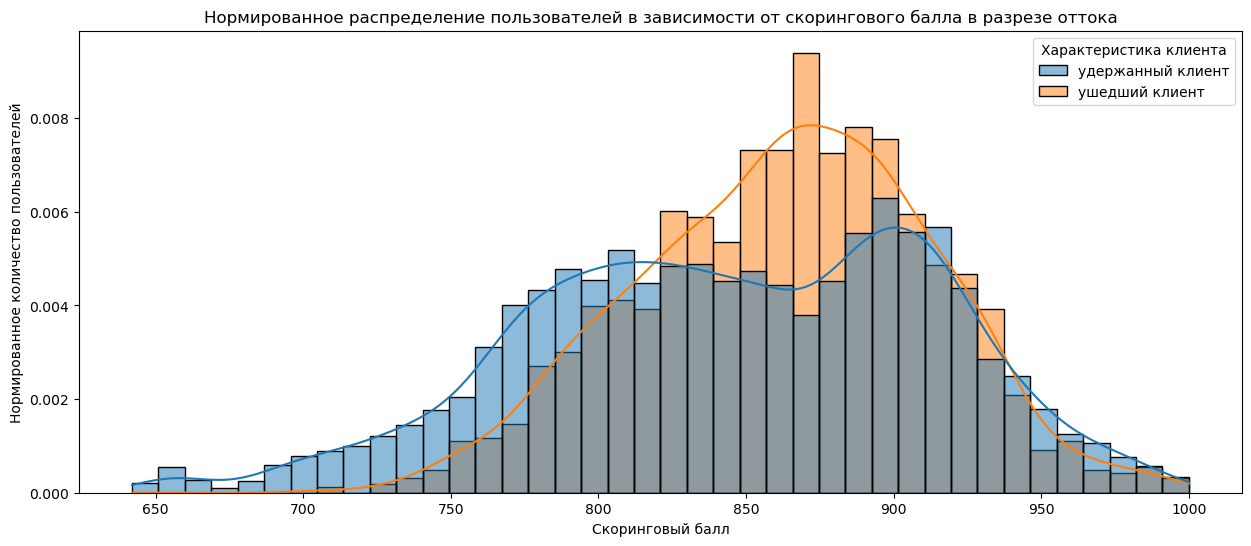

In [16]:
plt.figure(figsize=(15, 6))
ax = sns.histplot(
    data = df[['churn', 'score']],
    x='score',
    stat='density',
    common_norm=False,
    hue='churn',
    kde=True)
ax.set (xlabel='Скоринговый балл',
 ylabel='Нормированное количество пользователей',
 title='Нормированное распределение пользователей в зависимости от скорингового балла в разрезе оттока')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['удержанный клиент', 'ушедший клиент'], title='Характеристика клиента')
plt.show()

In [17]:
len(df[((df['score']>880)&(df['score']<910))])

1730

Если рассматривать в разрезе скорингового балла, в диапазоне до 825 преоблодание лояльных клиентов, от 825 до 910 - доля уходящих выше, от 910 значения примерно равны, с небольшими перевесами, то в одну, то в другую сторону, в диапазоне 825-910 баллов 1730 клиентов  диапазоне, выделим их в отдельный признак

In [18]:
df['risk_score'] = np.where(((df['score']>880)&(df['score']<910)), 1,0)

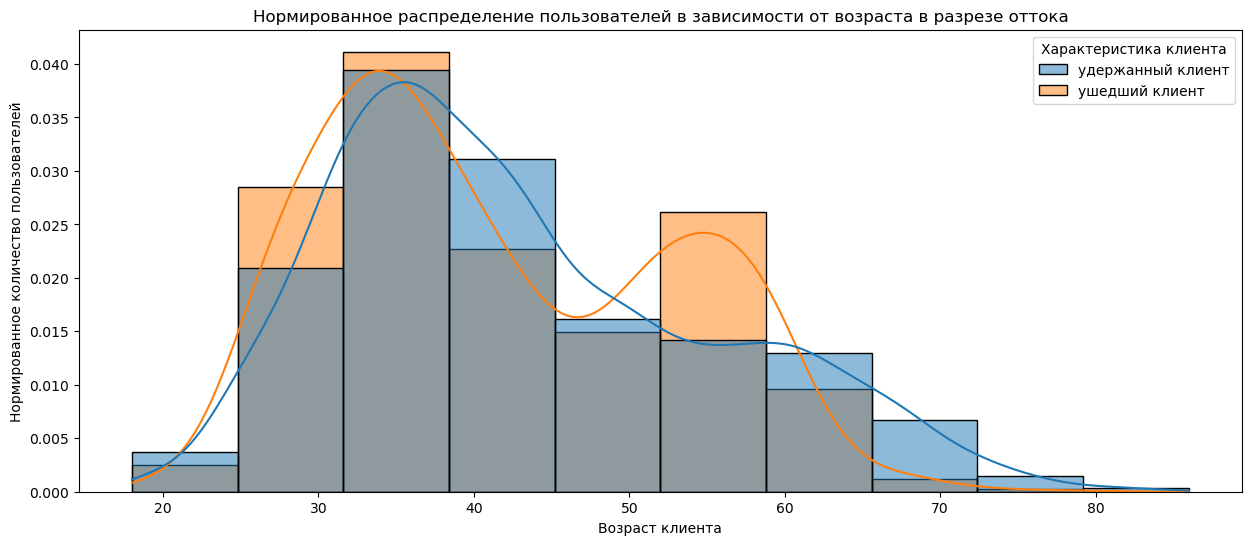

In [19]:
plt.figure(figsize=(15, 6))
ax = sns.histplot(
    data = df[['churn', 'age']],
    x='age',
    bins = 10,
    stat='density',
    common_norm=False,
    hue='churn',
    kde=True)
ax.set (xlabel='Возраст клиента',
 ylabel='Нормированное количество пользователей',
 title='Нормированное распределение пользователей в зависимости от возраста в разрезе оттока')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['удержанный клиент', 'ушедший клиент'], title='Характеристика клиента')
plt.show()

In [20]:
len(df[((df['age']>25)&(df['age']<35))|((df['age']>54)&(df['age']<60))])

3301

В распределении по возрасту доля уходящих немного выше в диапазоне 25-35 лет и преобладает в 54-60 лет, суммарно 3350  клиентов попадают в диапазоны

In [21]:
df['risk_age'] = np.where(((df['age']>25)&(df['age']<35))|((df['age']>54)&(df['age']<60)), 1,0)

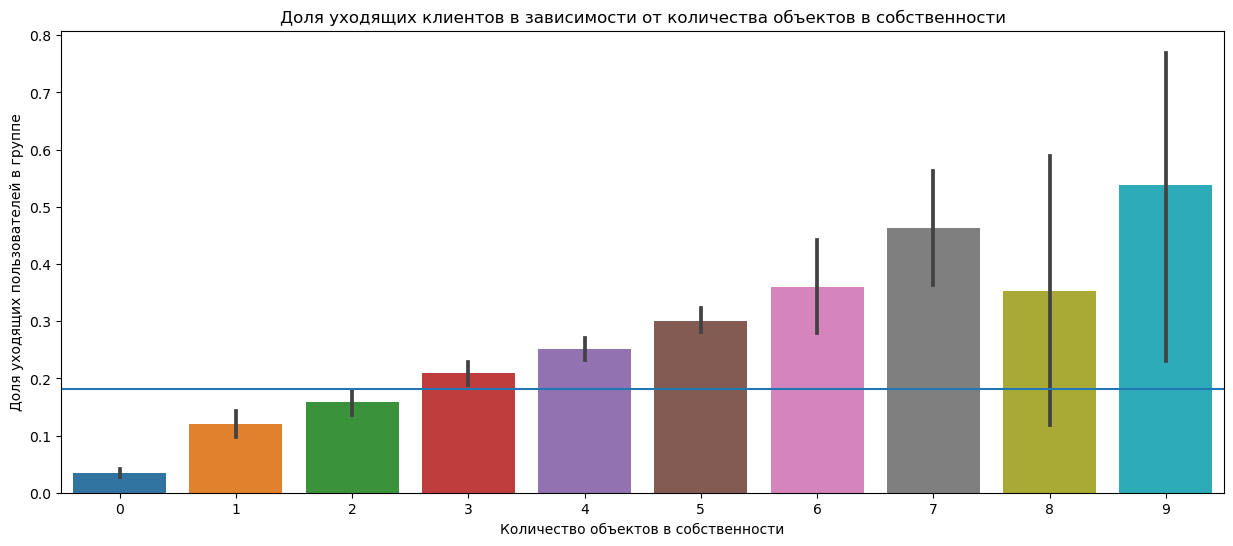

In [69]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='equity', y='churn', data=df)
ax.axhline(df['churn'].mean())
ax.set_title( 'Доля уходящих клиентов в зависимости от количества объектов в собственности' )
ax.set_xlabel( 'Количество объектов в собственности'  )
ax.set_ylabel( 'Доля уходящих пользователей в группе'  );

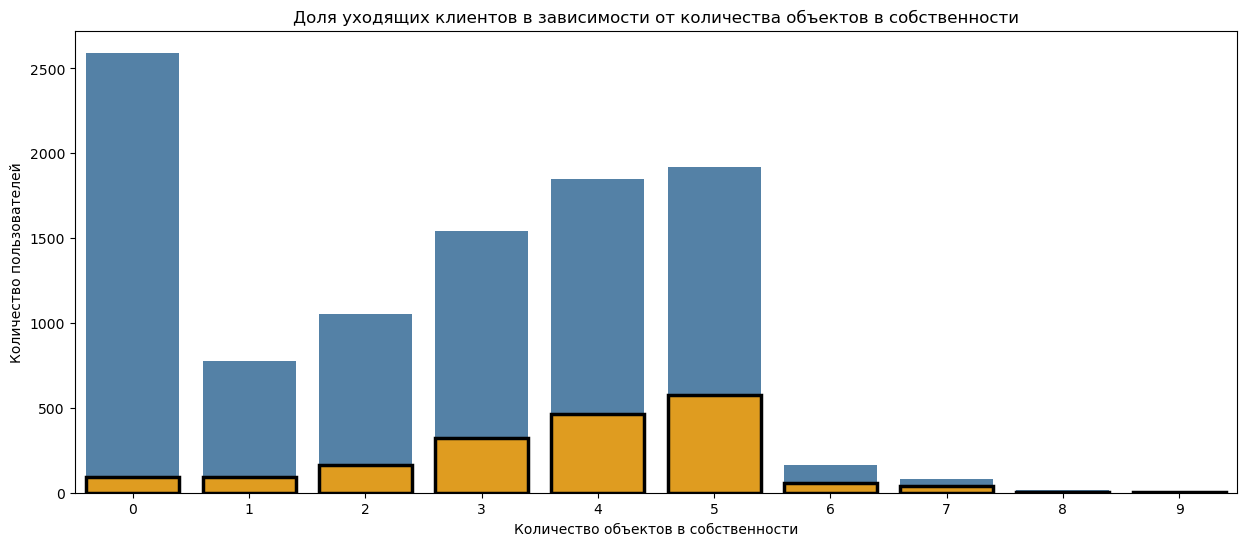

In [22]:
df_equity = df.groupby('equity').agg({'userid':'count', 'churn':'sum'})
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=df_equity.index, y='userid', data=df_equity, color='steelblue', ax=ax)
sns.barplot(x=df_equity.index, y='churn', data=df_equity, color='orange', linewidth=2.5, edgecolor='black', ax=ax)
ax.set_title( 'Доля уходящих клиентов в зависимости от количества объектов в собственности' )
ax.set_xlabel( 'Количество объектов в собственности'  )
ax.set_ylabel( 'Количество пользователей'  );

In [23]:
len(df[df['equity']>=3])

5582

чаще уходят клиенты, у которых более 2 объектов в собственности, в датасете их 5582

In [24]:
df['risk_equity'] = np.where((df['equity']>3), 1,0)

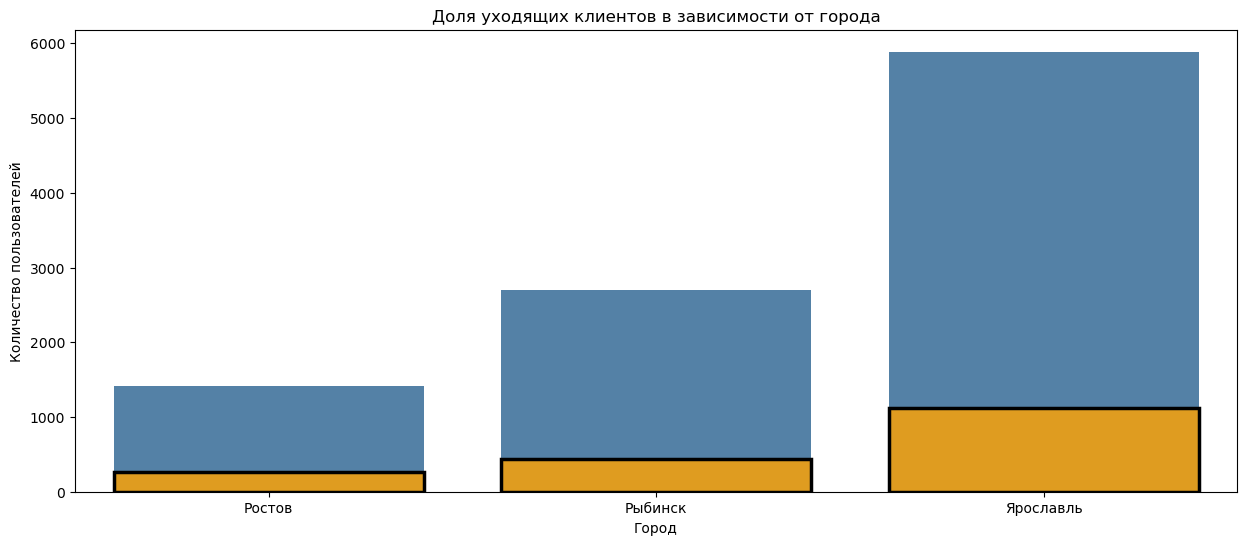

In [25]:
df_city = df.groupby('city').agg({'userid':'count', 'churn':'sum'})
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=df_city.index, y='userid', data=df_city, color='steelblue', ax=ax)
sns.barplot(x=df_city.index, y='churn', data=df_city, color='orange', linewidth=2.5, edgecolor='black', ax=ax)
ax.set_title( 'Доля уходящих клиентов в зависимости от города' )
ax.set_xlabel( 'Город'  )
ax.set_ylabel( 'Количество пользователей'  );

In [26]:
len(df[df['jar']==1])

5888

Среди городов небольшое преоблодание лояльных клиентов в Рыбинске, а доля уходящих чуть выше в Ярославле. В Ростове ситация средняя по датасету. 5905 клиентов из Ярославля

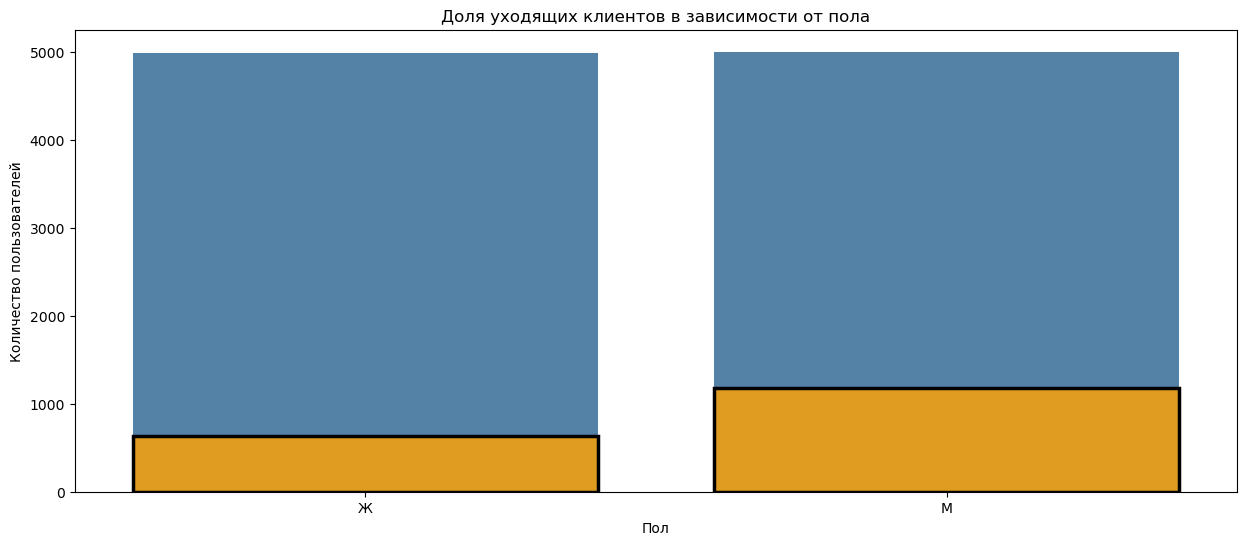

In [27]:
df_gender = df.groupby('gender').agg({'userid':'count', 'churn':'sum'})
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=df_gender.index, y='userid', data=df_gender, color='steelblue', ax=ax)
sns.barplot(x=df_gender.index, y='churn', data=df_gender, color='orange', linewidth=2.5, edgecolor='black', ax=ax)
ax.set_title( 'Доля уходящих клиентов в зависимости от пола' )
ax.set_xlabel( 'Пол'  )
ax.set_ylabel( 'Количество пользователей'  );

In [28]:
len(df[df['gen_cod']==1])

5005

Клиентов мужчин чуть больше, но среди них и больше уходящих, меньшинство женщин более лояльно. 5007 мужчин

In [29]:
len(df[df['balance']>3000000])*100/len(df)

2.01

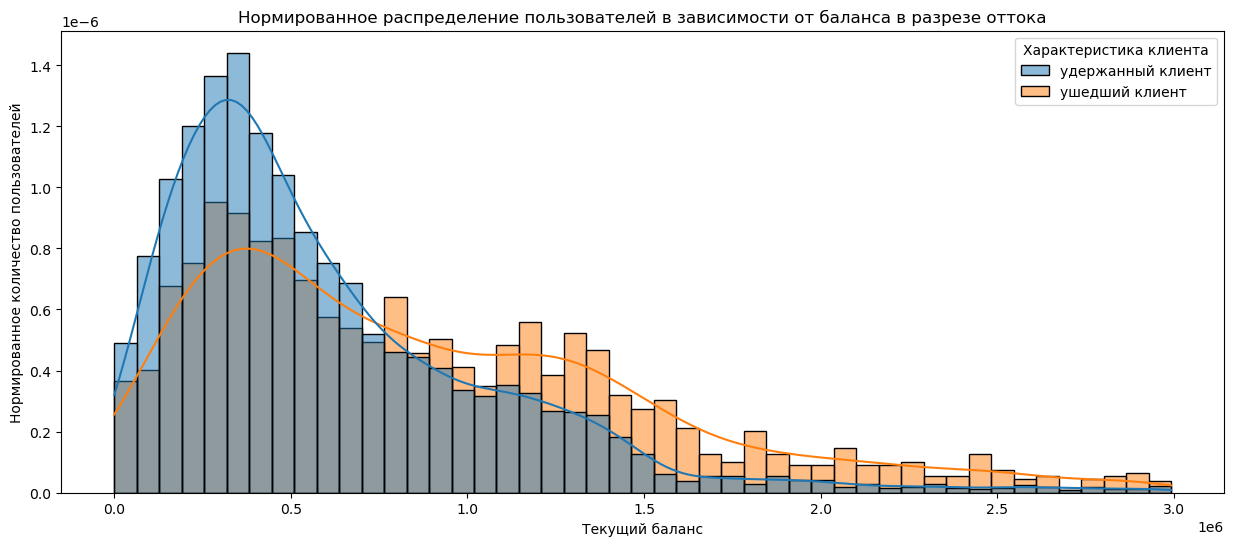

In [30]:
df_lim = df[df['balance']<=3000000]
plt.figure(figsize=(15, 6))
ax = sns.histplot(
    data = df_lim[['churn', 'balance']],
    x='balance',
    stat='density',
    common_norm=False,
    hue='churn',
    kde=True)
ax.set (xlabel='Текущий баланс',
 ylabel='Нормированное количество пользователей',
 title='Нормированное распределение пользователей в зависимости от баланса в разрезе оттока')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['удержанный клиент', 'ушедший клиент'], title='Характеристика клиента')
plt.show()

In [31]:
len(df[df['balance']>800000])

2510

Клиентов с балансом выше 3 млн около 2% датасета, но они уменьшают масштаб графика таким образом, что им невозможно воспользоваться. После их отсечения общая динамика становиться наглядной - среди клиентов с балансом выше 800 тыс доля уходящих выше. Таких в датасете 2510.

In [32]:
np.percentile(df[df['balance'].isna()]['churn'], 95)

0.0

более 95% пользователей с отсутствующими данными не уходят из банка, отнесем их к категории до 800 тыс и заменим пропуски на 0

In [33]:
#df['balance'] = df['balance'].fillna(0)

In [34]:
df['risk_balance'] = np.where((df['balance']>800000), 1,0)

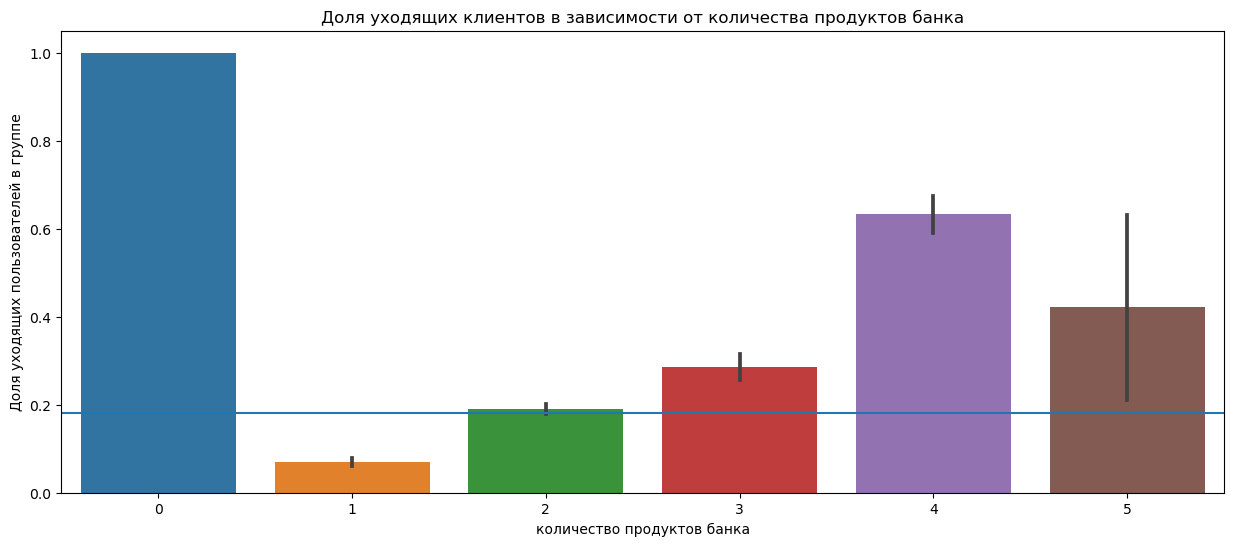

In [70]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='products', y='churn', data=df)
ax.axhline(df['churn'].mean())
ax.set_title( 'Доля уходящих клиентов в зависимости от количества продуктов банка' )
ax.set_xlabel( 'количество продуктов банка'  )
ax.set_ylabel( 'Доля уходящих пользователей в группе'  );

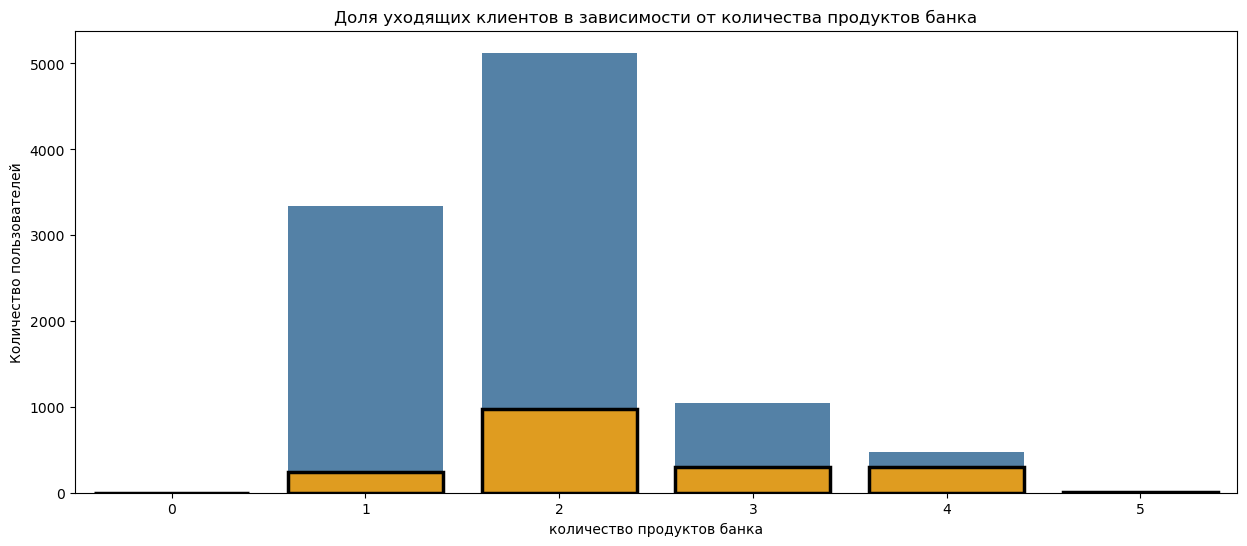

In [35]:
df_products = df.groupby('products').agg({'userid':'count', 'churn':'sum'})
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=df_products.index, y='userid', data=df_products, color='steelblue', ax=ax)
sns.barplot(x=df_products.index, y='churn', data=df_products, color='orange', linewidth=2.5, edgecolor='black', ax=ax)
ax.set_title( 'Доля уходящих клиентов в зависимости от количества продуктов банка' )
ax.set_xlabel( 'количество продуктов банка'  )
ax.set_ylabel( 'Количество пользователей'  );

In [36]:
len(df[df['products']>=2])

6658

доля уходящих повышается с увеличением количества используемых продуктов,  более 2 - в зоне риска. 6658 клиента

In [37]:
df['risk_products'] = np.where((df['products']>2), 1,0)

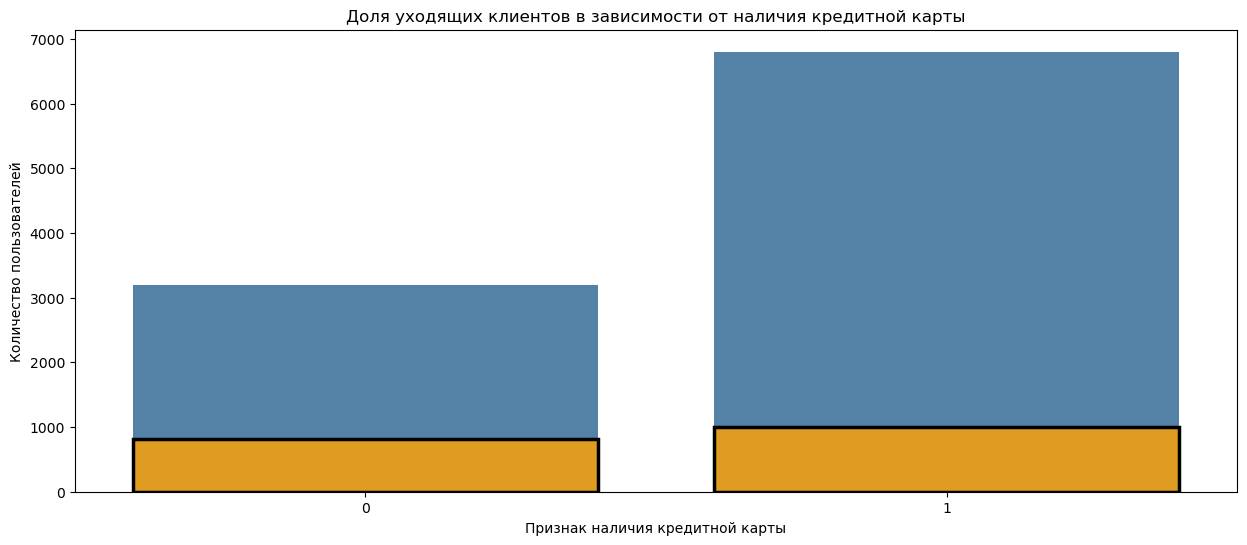

In [38]:
df_credit_card = df.groupby('credit_card').agg({'userid':'count', 'churn':'sum'})
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=df_credit_card.index, y='userid', data=df_credit_card, color='steelblue', ax=ax)
sns.barplot(x=df_credit_card.index, y='churn', data=df_credit_card, color='orange', linewidth=2.5, edgecolor='black', ax=ax)
ax.set_title( 'Доля уходящих клиентов в зависимости от наличия кредитной карты' )
ax.set_xlabel( 'Признак наличия кредитной карты'  )
ax.set_ylabel( 'Количество пользователей'  );

In [39]:
len(df[df['credit_card']==0])

3196

Среди владельцев кредитных карт лояльность выше. 3196 клиентов не имеют кредитной карты.

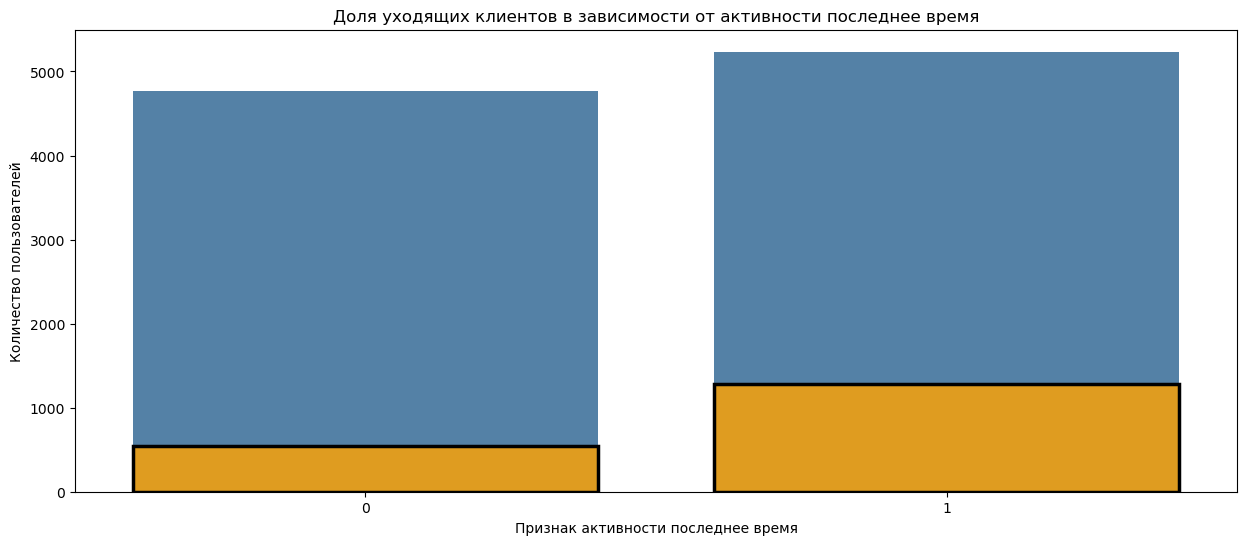

In [40]:
df_last_activity = df.groupby('last_activity').agg({'userid':'count', 'churn':'sum'})
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=df_last_activity.index, y='userid', data=df_last_activity, color='steelblue', ax=ax)
sns.barplot(x=df_last_activity.index, y='churn', data=df_last_activity, color='orange', linewidth=2.5, edgecolor='black', ax=ax)
ax.set_title( 'Доля уходящих клиентов в зависимости от активности последнее время' )
ax.set_xlabel( 'Признак активности последнее время'  )
ax.set_ylabel( 'Количество пользователей'  );

Как это ни странно, чаще уходят пользователи, активные в последнее время. Хотя возможно, что действия по закрытию счету система тоже интерпритирует как активность.

In [41]:
len(df[df['est_salary']>400000])*100/len(df)

3.37

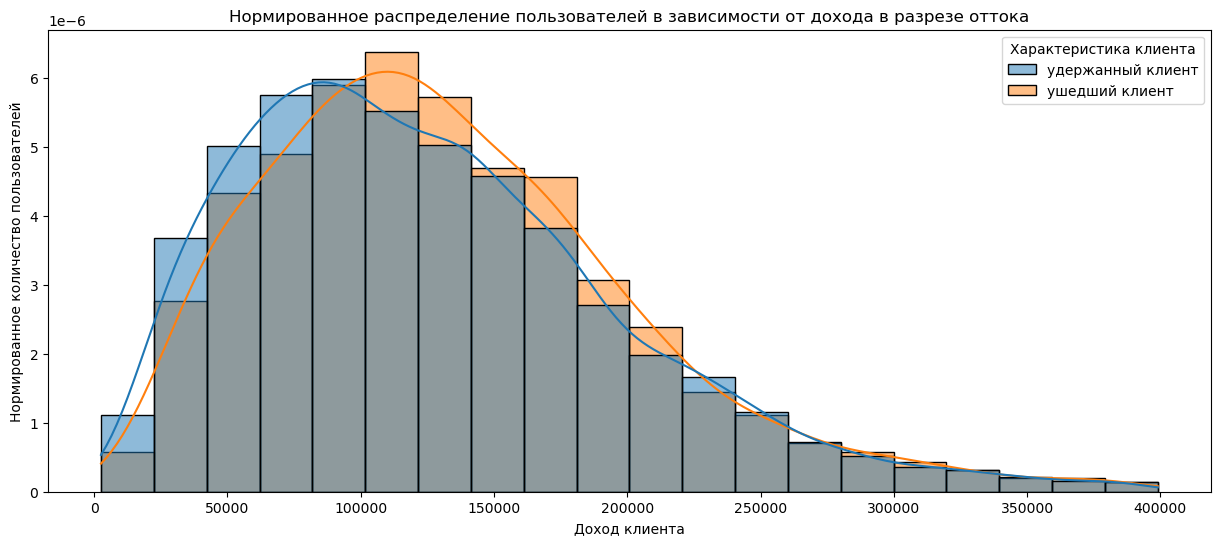

In [42]:
df_lim = df[df['est_salary']<=400000]
plt.figure(figsize=(15, 6))
ax = sns.histplot(
    data = df_lim[['churn', 'est_salary']],
    x='est_salary',
    bins = 20,
    stat='density',
    common_norm=False,
    hue='churn',
    kde=True)
ax.set (xlabel='Доход клиента',
 ylabel='Нормированное количество пользователей',
 title='Нормированное распределение пользователей в зависимости от дохода в разрезе оттока')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['удержанный клиент', 'ушедший клиент'], title='Характеристика клиента')
plt.show()


In [43]:
len(df[((df['est_salary']>=100000)&(df['est_salary']<=220000))])

4721

Откинув 3,5% пользователей с доходом выше 400 тыс, наблюдаем, что в диапазоне от 100 до 220 тыс доля уходящих выше. 4721

In [44]:
df['risk_salary'] = np.where((df['est_salary']>=100000)&(df['est_salary']<=220000), 1,0)

### 3. Проверка гипотез

#### Гипотеза о разнице дохода
Сформулируем гипотезу:  
H_0: Доход клиентов(est_salary) которые ушли = Доход клиентов(est_salary) которые остались  

H_a: Доход клиентов(est_salary) которые ушли ≠ Доход клиентов(est_salary) которые остались
alpha = 0.05  
Таким образом задача сводится к проверке гипотезы о равнстве средних двух генеральных совокупностей, применим для решения тест Стьюдента (st.ttest). Проверим необходимые для его корректного использования ограничения:  
1. Генеральные совокупности не должны зависеть друг от друга - у нас один файл, но абсолютно разные клиенты, у каждого свои параметры, таким образом считаем, что совокупности не зависимы
2. Выборочные средние должны быть нормально распределены, для генеральных совокупностей это условие у нас не соблюдается, но количество объектов в них более 100 значений в каждой, таким образом выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. 
3. Дисперсии рассматриваемых генеральных совокупностей должны быть равны. Этот параметр в st.ttest регулируется значением equal_var, в нашем случае размеры выборок значительно отличаются друг от друга, и нет основания пологать, что они имеют одинаковые дисперсии, поэтому установим этот параметр в значение False

In [45]:
results = (st.ttest_ind(
    df.loc[df['churn'] == 1, 'est_salary'],
    df.loc[df['churn'] == 0, 'est_salary'], 
    equal_var = False)) #  вызов метода для проверки гипотезы

alpha = 0.05 #задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
    

0.8887054822123845
Не получилось отвергнуть нулевую гипотезу


Таким образом нет оснований полагать, что есть статистически значимая разность в уровне дохода клиентов которые ушли.

#### Гипотеза о разнице баланса
Сформулируем гипотезу:
H_0: Баланс клиентов(balance) которые ушли = Баланс клиентов(balance) которые остались

H_a: Баланс клиентов(balance) которые ушли ≠ Баланс клиентов(balance) которые остались  
alpha = 0.05  
Таким образом задача сводится к проверке гипотезы о равнстве средних двух генеральных совокупностей, применим для решения тест Стьюдента (st.ttest). Проверим необходимые для его корректного использования ограничения:

Генеральные совокупности не должны зависеть друг от друга - у нас один файл, но абсолютно разные клиенты, у каждого свои параметры, таким образом считаем, что совокупности не зависимы
Выборочные средние должны быть нормально распределены, для генеральных совокупностей это условие у нас не соблюдается, но количество объектов в них более 100 значений в каждой, таким образом выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности.
Дисперсии рассматриваемых генеральных совокупностей должны быть равны. Этот параметр в st.ttest регулируется значением equal_var, в нашем случае размеры выборок значительно отличаются друг от друга, и нет основания пологать, что они имеют одинаковые дисперсии, поэтому установим этот параметр в значение False

In [46]:
results = (st.ttest_ind(
    df.loc[df['churn'] == 1, 'balance'],
    df.loc[df['churn'] == 0, 'balance'], 
    equal_var = False)) #  вызов метода для проверки гипотезы

alpha = 0.05 #задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

nan
Не получилось отвергнуть нулевую гипотезу


Таким образом нет оснований полагать что баланс клиентов которые ушли равен балансу клиентов которые остались

### 4 Сегментация

Статистически значимым  и максимально важным для банка является признак текущего балланса клиента - судя по предедущему анализу, из банка уходят клиенты с большим остатком на счетах, таким образом ушеньшая размер собственных активов Банка, рассмотрим эту категорию в среднем.

In [47]:
df.groupby('risk_balance').mean()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gen_cod,jar,ryb,rost,risk_score,risk_age,risk_equity,risk_products,risk_salary
risk_balance,,,,,,,,,,,,,,,,,,,
0,171370.193992,841.425901,41.875184,2.116956,3.815416e+05,1.736716,0.724433,0.522563,141106.631123,0.124433,0.496662,0.582911,0.272630,0.144459,0.158211,0.348331,0.291455,0.111081,0.449933
1,173141.184462,870.403984,45.293578,4.151394,1.751413e+06,2.268127,0.549004,0.526295,168039.915669,0.353785,0.511952,0.606375,0.260159,0.133466,0.217131,0.275697,0.739442,0.278884,0.538247


In [48]:
df.groupby('risk_balance')['userid'].count()

risk_balance
0    7490
1    2510
Name: userid, dtype: int64

In [49]:
df.groupby('risk_balance').median()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gen_cod,jar,ryb,rost,risk_score,risk_age,risk_equity,risk_products,risk_salary
risk_balance,,,,,,,,,,,,,,,,,,,
0,171945.5,843.0,39.0,2.0,366885.980,2.0,1.0,1.0,113259.21,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,174387.0,877.0,43.0,4.0,1232389.985,2.0,1.0,1.0,137366.84,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


В среднем более 35% пользователей с балансом выше 800 тыс. приняли решение об уходе, всего таких клиентов 2510 человек. При таких показателях принимаю решение не проводить дальнейшую сегментацию, а выделить их в отдельную категорию, приняв во внимание средние значения: возраст 45 лет, 4 объекта в собственности, 2 продукта банка.  
Сформулируем общие рекомендации для этой группы:  
1. Для удержания клиентов с большим балансом на счетах, необходимо заинтересовать их дополнительным доходом, который они могут заработать с его помощью. Маркетинговые активности должны быть направлены на инвестиционные продукты, реализуемые в нашем Банке - ИИС, ИЖС, брокерский счет, повышеный процент на ежедневный остаток на счете (при среднем значении в 1,75 млн  и медианой в 1,23 млн, например от 1,5 млн)
2. Учитывая средние 4 объекта в собственности и более 2 продуктов банка, возможно предложить скидки на собственный 2 и последующие продукты, либо скидки на продукты партнеров банка - СК (при наличии) например скидка 50% на страхование объектов недвижимости (при маржинальности 80% и более продукта для Банка)

Далее рассмотрим группу клиентов, имеющих  более 2 продуктов банка - в среднем комиссионый доход с таких клиентов выше, исключив проработанных ранее клиентов с высоким балансом:

In [50]:
df[df['risk_balance'] == 0].groupby('risk_products').mean()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gen_cod,jar,ryb,rost,risk_score,risk_age,risk_equity,risk_balance,risk_salary
risk_products,,,,,,,,,,,,,,,,,,,
0,171367.139682,842.418594,41.884099,1.965305,376027.562322,1.542806,0.756984,0.519676,145435.897564,0.104836,0.497747,0.566837,0.285071,0.148093,0.164314,0.346651,0.263142,0.0,0.456594
1,171394.635817,833.481971,41.804087,3.330529,411700.884832,3.288462,0.463942,0.545673,106462.092704,0.281250,0.487981,0.711538,0.173077,0.115385,0.109375,0.361779,0.518029,0.0,0.396635


In [51]:
df[df['risk_balance'] == 0].groupby('risk_products')['equity'].median()

risk_products
0    2.0
1    4.0
Name: equity, dtype: float64

Наблюдаем, что клиенты с 2 и более продуктов имеют 3 и более объектов недвижимости в собственности в среднем, половина из них имеет не менее 4, добавим этот признак:

In [52]:
df.query('(risk_balance == 0) and (risk_equity == 1)').groupby('risk_products').mean()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gen_cod,jar,ryb,rost,risk_score,risk_age,risk_equity,risk_balance,risk_salary
risk_products,,,,,,,,,,,,,,,,,,,
0,170624.131849,842.757991,40.802173,4.591324,498691.578659,1.769977,0.708904,0.515411,103167.375582,0.184932,0.460046,0.537671,0.287100,0.175228,0.142694,0.398973,1.0,0.0,0.418379
1,171320.821346,844.800464,40.844548,4.714617,485526.540835,3.375870,0.477958,0.582367,95987.393225,0.315545,0.573086,0.689095,0.194896,0.116009,0.148492,0.380510,1.0,0.0,0.380510


In [53]:
df.query('(risk_balance == 0) and (risk_equity == 1)').groupby('risk_products').count()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,churn,gen_cod,jar,ryb,rost,risk_score,risk_age,risk_equity,risk_balance,risk_salary
risk_products,,,,,,,,,,,,,,,,,,,,,
0,1752,1752,1752,1752,1749,1752,1752,1752,1752,1752,...,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752
1,431,431,431,431,431,431,431,431,431,431,...,431,431,431,431,431,431,431,431,431,431


Итого 431 клиент, имеющий остаток на счетах до 800 тыс. включительно, обладающий 2 и более продуктами банка, и владеющий 3 и более объектами недвижимости имеют вероятность ухода в 31,5%.   
Группа немногочисленная, поэтому в части мероприятий, предлагаю присоединить к группе с большими остатками на счетах в части предложений по продуктам и недвижимости в собственности. Окончательно сформулирую в итоговых выводах и презентации.

Рассмотрим оставшуюся группу клиентов в разрезе оставшихся категорий риска:

In [54]:
df_temp = df.query('(risk_balance == 0) or ((risk_equity == 0) and (risk_products == 0))')

df_temp['userid'].count()

7966

In [55]:
df_temp.mean()

C:\Users\User\AppData\Local\Temp\ipykernel_4896\2646066452.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_temp.mean()


userid           171453.118504
score               842.019583
age                  42.085358
equity                2.148883
balance          474456.322169
products              1.743535
credit_card           0.716420
last_activity         0.522094
est_salary       142189.930503
churn                 0.131810
gen_cod               0.498117
jar                   0.582727
ryb                   0.271655
rost                  0.145619
risk_score            0.158047
risk_age              0.343711
risk_equity           0.274040
risk_balance          0.059754
risk_products         0.104444
risk_salary           0.457821
dtype: float64

Средний уровень ухода для этой группы в районе 13%.
45% из оставшихся 7966 клиентов имеют рисковое значение в категории доход, и хотя мы отметили ранее, что разница в доходе не является статистически значимой между уходящими и сохраняющимися клиентами, рассмотрим эту категорию подробнее:

In [56]:
df_temp.groupby('risk_salary').mean()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gen_cod,jar,ryb,rost,risk_score,risk_age,risk_equity,risk_balance,risk_products
risk_salary,,,,,,,,,,,,,,,,,,,
0,172063.723316,839.335494,42.382544,2.285714,453566.286478,1.787914,0.710118,0.523964,136772.085934,0.127113,0.480667,0.570271,0.278074,0.151655,0.136143,0.399630,0.297754,0.046075,0.116231
1,170730.003016,845.198245,41.733150,1.986838,501999.398663,1.690979,0.723883,0.519879,148606.072728,0.137373,0.518783,0.597477,0.264053,0.138470,0.183987,0.277488,0.245956,0.075953,0.090485


Вероятность ухода в районе 13,7%,  а по категории, изначально определенной как лояльная, вероятность 12,7%.
51% мужчин в оставшейся выборке, посмотрим на них:

In [57]:
df_temp.groupby('gen_cod').mean()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,jar,ryb,rost,risk_score,risk_age,risk_equity,risk_balance,risk_products,risk_salary
gen_cod,,,,,,,,,,,,,,,,,,,
0,171219.195348,841.902951,44.719589,2.228864,460804.060777,1.769135,0.647074,0.529515,132883.857824,0.092796,0.570785,0.276888,0.152326,0.152076,0.315658,0.282641,0.057029,0.106553,0.438969
1,171688.810232,842.137097,39.430485,2.068296,489628.325242,1.717742,0.786290,0.514617,151566.361595,0.171119,0.594758,0.266381,0.138861,0.164062,0.371976,0.265373,0.062500,0.102319,0.476815


Как и предпологалось вероятнось ухода мужчин выше,  составляет 17%,  
рассмотрим возраст, который мы определили как рисованный:

In [58]:
df_temp.groupby('risk_age').mean()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gen_cod,jar,ryb,rost,risk_score,risk_equity,risk_balance,risk_products,risk_salary
risk_age,,,,,,,,,,,,,,,,,,,
0,172184.694147,840.584162,45.224784,2.068477,492841.516725,1.723795,0.709640,0.517598,153617.871393,0.107116,0.476664,0.576129,0.274101,0.149770,0.154361,0.252487,0.066373,0.101568,0.504017
1,170056.231191,844.760409,36.117239,2.302411,440814.351891,1.781227,0.729364,0.530679,120369.158053,0.178963,0.539080,0.595325,0.266983,0.137692,0.165084,0.315194,0.047115,0.109934,0.369613


Почти 18% вероятности ухода  
Распределение по городам:

In [59]:
df_temp.groupby('city').mean()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gen_cod,jar,ryb,rost,risk_score,risk_age,risk_equity,risk_balance,risk_products,risk_salary
city,,,,,,,,,,,,,,,,,,,,
Ростов,169117.618966,838.184483,43.573770,2.431034,456491.888389,1.769828,0.589655,0.534483,106587.047336,0.147414,0.475000,0.0,0.0,1.0,0.134483,0.325000,0.307759,0.067241,0.082759,0.435345
Рыбинск,172798.741682,842.408041,42.544821,2.147874,456138.603297,1.721811,0.665896,0.556839,132137.341345,0.129390,0.488447,0.0,1.0,0.0,0.163586,0.337800,0.271257,0.056377,0.066543,0.445009
Ярославль,171409.441405,842.796855,41.499244,2.078845,488753.719836,1.747092,0.771650,0.502801,155773.116073,0.129039,0.508402,1.0,0.0,0.0,0.161353,0.351142,0.266911,0.059457,0.127531,0.469410


14,7% в Ростове, по 12,9 Рыбинск и Ярославль.  
Наличие кредитной карты:

In [60]:
df_temp.groupby('credit_card').mean()

,userid,score,age,equity,balance,products,last_activity,est_salary,churn,gen_cod,jar,ryb,rost,risk_score,risk_age,risk_equity,risk_balance,risk_products,risk_salary
credit_card,,,,,,,,,,,,,,,,,,,
0,170657.084551,848.734396,44.430537,2.533865,539360.979014,2.033643,0.543161,127104.454449,0.174856,0.375387,0.469234,0.320053,0.210713,0.169101,0.328021,0.325365,0.086321,0.197432,0.445772
1,171768.212371,839.361661,41.156766,1.996496,443383.323481,1.628702,0.513755,148161.209706,0.114771,0.546697,0.627650,0.252497,0.119853,0.153671,0.349921,0.253723,0.049238,0.067636,0.462590


17% у неимеющих карту  
и наконец скоринговый балл:

In [61]:
df_temp.groupby('risk_score').mean()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gen_cod,jar,ryb,rost,risk_age,risk_equity,risk_balance,risk_products,risk_salary
risk_score,,,,,,,,,,,,,,,,,,,
0,171505.026241,832.091993,42.178256,2.248099,459245.745480,1.784703,0.720143,0.522737,141687.890643,0.133443,0.494558,0.580438,0.269867,0.149694,0.340838,0.278664,0.059937,0.110482,0.443716
1,171176.593328,894.906275,41.590764,1.620334,618689.701867,1.524226,0.696585,0.518666,144864.419261,0.123114,0.517077,0.594917,0.281176,0.123908,0.359015,0.249404,0.058777,0.072280,0.532963


13,3 % у тех, кого мы изначально не относили к группе риска и 12,3% у изначально отведенных к рисковой зоне 
На основе этих данных сформулируем профиль: мужчина, в возрасте 25-35 или 54-60 лет, обсуживающийся  в Ростове, не имеющий кредитной карты, добавим признаки поочередно и посмотрим размер сегмента и вероятность ухода для него:

In [62]:
df_temp.query('(gen_cod == 1)\
    and (rost == 1)\
    and (credit_card == 0)\
    and(risk_age == 1)')['userid'].count()

77

In [63]:
df_temp.query('(gen_cod == 1)\
    and (rost == 1)\
    and (credit_card == 0)\
    and(risk_age == 1)')['churn'].mean()

0.2987012987012987

Сочетание всех параметров по приципу максимальной доли ушедших дает пересечение на 77 пользователях, с вероятностью 29,9%, то есть сегменты с большим количеством клиентов будут более лояльными.  Сегмент в 77 человек не рассматривается в виду малого количества, все остальные сегменты будут с меньшей вероятностью ухода, поэтому так же убираем их из рассмотрения.
На этом сегментацию считаю завершенной.

## Общие выводы по работе

По результату проведенного исследования выявлены 2 основных категории клиентов, с большой вероятностью ухода из Банка:
1. Клиенты с текущим остатком на счетах более 800 тыс, таких клиентов 2510 человек, вероятность ухода 35,4%.  
Рекомендуемые маркетинговые мероприятия для этого сегмента:  
  1.1 Предложение индивидуальной повышенной ставки на срочные депозиты и вклады  
  1.2 Предложение инвестиционных продуктов, реализуемых Банком (ИЖС, ИИС, ПИФ, брокерский счет и т.п.)
  1.3 Начисление индивидуальной ставки на ежедневный остаток на счете (Возможно не для всех, а для тех, у кого остаток выше среднего по сегменту (1,5 млн)) - например ставка Ruonia - маржа банка.
2. Клиенты пользующиеся 2 и более продуктами Банка, и имеющие в собственности 3 и более объекта недвижимости. 431 человек, не входящих в 1 категорию и 522 человека, которых прорабатываем по первому сегменту. Вероятность ухода 31,5%.
Рекомендуемые маркетинговые мероприятия для этого сегмента (рекомендуются так же для попадающих под условия и включенных в 1 сегмент):
  2.1 Предоставление индивидуальной скидки на 3й и последующие продукты Банка владельцам 3 и более объектов недвижимости
  2.2 Предоставление индивидуальной скидки на комплект страховых продуктов от СК-партнера Банка на страхование от 3 объектов недвижимости для пользователей 2 и более продуктов банка.